In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [5]:
Data=pd.read_csv("./Data/smartphone_data_growth.csv")

In [6]:
Data.head()

,Date,Days_Since_Start,Smartphone_Users_Millions,Data_Consumption_PB
0,2014-01-01,0,203.38,166.86
1,2014-01-02,1,199.08,156.64
2,2014-01-03,2,200.10,144.94
3,2014-01-04,3,200.86,171.52
4,2014-01-05,4,198.48,165.10


In [7]:
X=Data[["Days_Since_Start"]]
y=Data["Data_Consumption_PB"]

In [8]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
predicted_score=model.predict(X_test)

In [12]:
predicted_score

array([177.38800241, 271.86657301, 176.48698062, 285.83241076,
       255.71253948, 161.78101783, 216.03540135, 166.31830613,
       165.83561588, 185.36848112, 269.22786634, 282.96844864,
       196.40599806, 207.73312914, 283.67639433, 271.57695886,
       197.66099269, 174.68493704, 178.64299705, 169.85803459,
       205.12660182, 213.39669468, 275.05232862, 214.32989582,
       241.26401148, 166.12523003, 284.60959547, 264.04699104,
       228.10265747, 199.91354717, 233.50878821, 198.98034603,
       285.60715531, 238.81838091, 236.21185359, 164.32318645,
       187.4923182 , 223.17921697, 238.56094611, 283.90164978,
       230.70918479, 191.90088911, 257.57894176, 182.21490486,
       260.66815933, 275.24540472, 223.46883112, 165.28856694,
       163.03601246, 258.5765016 , 193.47767724, 286.7012532 ,
       169.63277914, 218.15923843, 177.77415461, 187.8141117 ,
       231.28841309, 204.93352572, 263.27468665, 286.18638361,
       264.07917039, 189.42307918, 242.48682677, 268.26

In [13]:
mae=mean_absolute_error(y_test,predicted_score)
mse=mean_squared_error(y_test,predicted_score)
rmse=np.sqrt(mse)
print("MAE",mae)
print("MSE",mse)
print("RMSE",rmse)

MAE 7.7550884819826225
MSE 97.78458740352119
RMSE 9.888608972121467


1. MSE = 97.78
MSE is the average squared difference between actual and predicted values.
Since data consumption ranges around 150–300 PB, an MSE of 97.78 is low, meaning predictions are close to real values and big errors are rare.

2. RMSE = 9.88
RMSE is the square root of MSE and is in PB units.
An RMSE of about 10 PB means predictions are, on average, only 10 PB away from actual values, which is small compared to 150+ PB, so the model is accurate.

In [14]:
r2 = r2_score(y_test,predicted_score)
print("r2 score :",r2)

r2 score : 0.9344040262737215


1. R² = 0.93
R² shows how well the model explains the data.
A value of 0.93 means 93% of the variation in data consumption is explained by days since start, showing a strong linear relationship and excellent fit.)

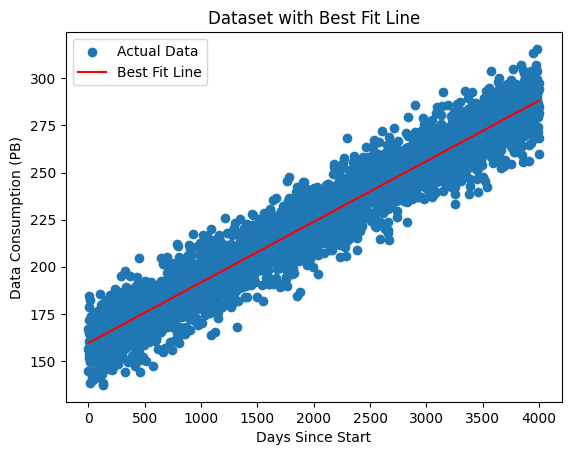

In [15]:
plt.scatter(Data["Days_Since_Start"], Data["Data_Consumption_PB"], label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Best Fit Line")
plt.title("Dataset with Best Fit Line")
plt.xlabel("Days Since Start")
plt.ylabel("Data Consumption (PB)")
plt.legend()
plt.show()

## The scatter plot shows a clear upward trend, meaning data consumption increases as days increase.
## The red best-fit line passes through the center of most data points, showing the model fits the data well.
## Most points lie close to the regression line, which matches the low RMSE and high R² score.
## This means the model can reliably predict future data consumption based on the number of days.

In [16]:
# plt.scatter(y_test, predicted_score)
# plt.xlabel("Original Values")
# plt.ylabel("Predicted Values")
# plt.title("Original vs Predicted Values")
# plt.show()


In [17]:
# plt.scatter(y_test, predicted_score)
# plt.xlabel("Original Values")
# plt.ylabel("Predicted Values")
# plt.title("Original vs Predicted Values")
# plt.show()


In [18]:
# plt.scatter(y_test, predicted_score)
# plt.plot([y_test.min(), y_test.max()],
#          [y_test.min(), y_test.max()],
#          linestyle="--")
# plt.xlabel("Original Values")
# plt.ylabel("Predicted Values")
# plt.title("Original vs Predicted Values")
# plt.show()


In [19]:
# errors = abs(y_test - predicted_score)

# plt.scatter(y_test, predicted_score, c=errors)
# plt.xlabel("Original Values")
# plt.ylabel("Predicted Values")
# plt.title("Original vs Predicted (Color = Error Size)")
# plt.colorbar(label="Prediction Error")
# plt.show()
